In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import natsort

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

## **[금산]** 평균 기온변화

In [ ]:
path = '/content/drive/MyDrive/skt 데이터/data/충청남도/금산/'

file_list = os.listdir(path)
file_list_금산 = [file for file in file_list if file.endswith('.csv')]
file_list_금산 = natsort.natsorted(file_list_금산)
file_list_금산

['금산_2018.csv',
 '금산_2019.csv',
 '금산_2020.csv',
 '금산_2021.csv',
 '금산_2022.csv']

In [ ]:
Df = pd.DataFrame()
DF = pd.DataFrame()
for i in file_list_금산:
    data = pd.read_csv(path + i,encoding='cp949')
    Df = pd.concat([Df,data])
    DF = pd.concat([DF,data['평균기온(℃)']], axis=1)
    DF.rename(columns = {'평균기온(℃)' : i[7:11]}, inplace = True)

# DF: axis=1 방향으로 concat
# df: axis=0 방향으로 concat, 날짜 인덱스로 설정 o
# Df: axis=0 방향으로 concat, 날짜 인덱스로 설정 x
Df = Df.drop(columns = ['지점'])
Df = Df.dropna()
DF = DF.dropna() 
df = Df.set_index(keys='날짜')

**평균 기온 변화**

In [ ]:
import numpy as np

labels = []

count = 0
for i in range(len(df)):
  if (count % 10 == 0):
    labels.append(df.index[i])
  count += 1

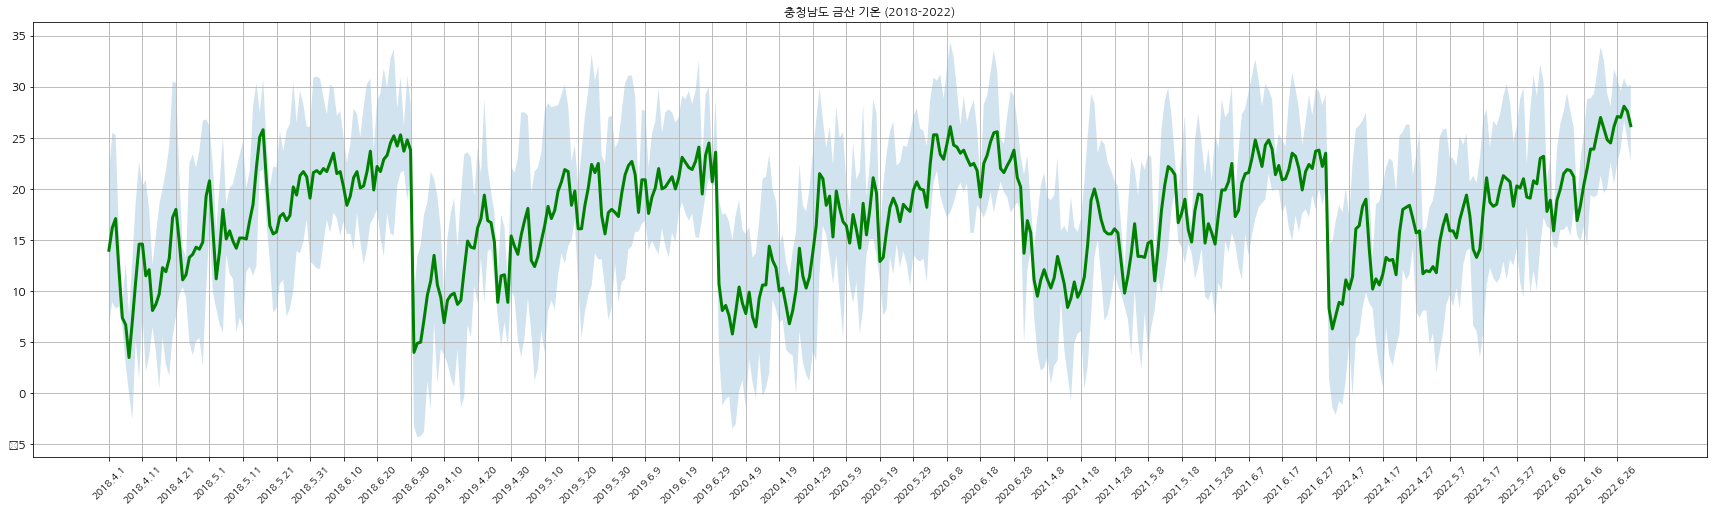

In [ ]:
date = df.index
plt.figure(figsize=(30, 8))
plt.fill_between(date,df['최저기온(℃)'], df['최고기온(℃)'], alpha=0.2)
gp = plt.plot(date, df['평균기온(℃)'])
plt.yticks(fontsize=12)
plt.grid(True)
plt.xticks(ticks=date, labels=labels, rotation=45)
plt.title('충청남도 금산 기온 (2018-2022)')
plt.locator_params(axis='x', nbins=len(labels))

plt.setp(gp, color='green', linewidth=3.0)
plt.show()

**년도 별 (4,5,6월 비교)**

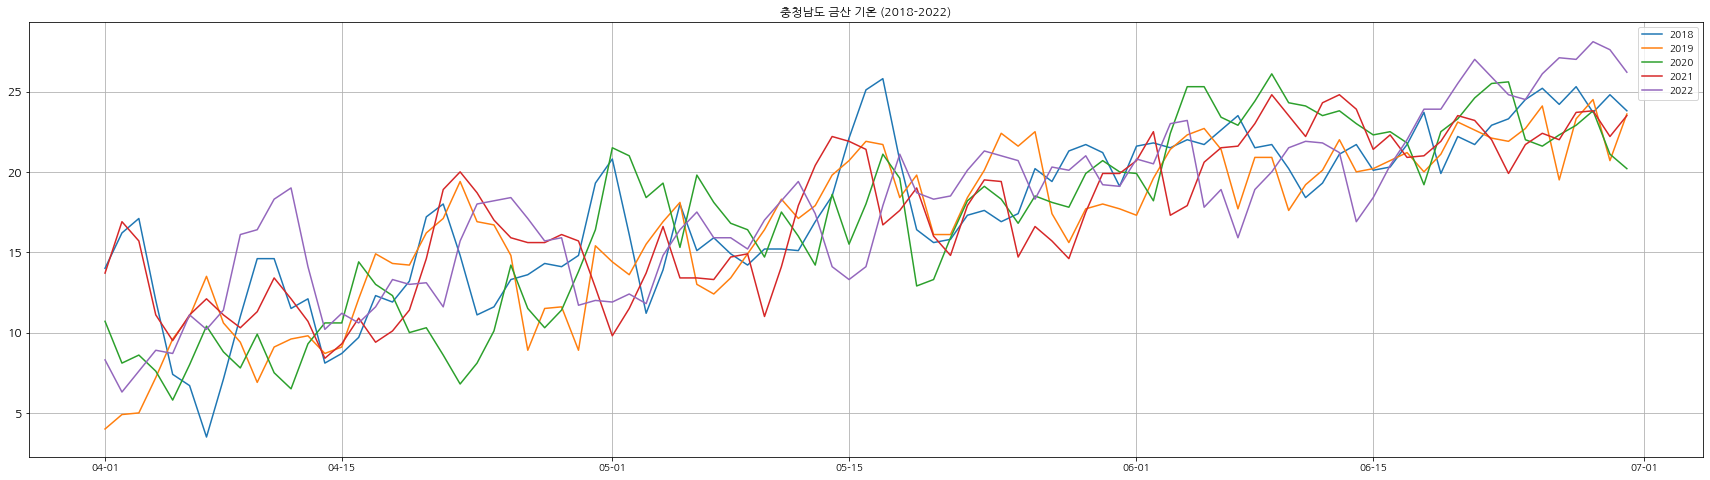

In [ ]:
from matplotlib import dates as mdates

d = pd.Series(pd.date_range(start='2000-04-01', end='2000-06-30', freq="D"))

plt.figure(figsize=(30, 8))
gp = plt.plot(d, DF)
plt.yticks(fontsize=12)
plt.grid(True)
plt.title('충청남도 금산 기온 (2018-2022)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.legend(DF.columns)

plt.show()

# **prophet : 금산 평균 기온 예측**

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()

Df.rename(columns = {'날짜' : 'ds'}, inplace = True)
Df.rename(columns = {'평균기온(℃)' : 'y'}, inplace = True)

m.fit(Df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/ayubgc_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/_wrga4hx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15602', 'data', 'file=/tmp/tmpo7y32ow3/ayubgc_m.json', 'init=/tmp/tmpo7y32ow3/_wrga4hx.json', 'output', 'file=/tmp/tmpo7y32ow3/prophet_model9msmyvkq/prophet_model-20221015160839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=1000)
future


,ds
1450,2025-03-22
1451,2025-03-23
1452,2025-03-24
1453,2025-03-25
1454,2025-03-26


In [ ]:
forecast = m.predict(future)
forecast = forecast[['ds', 'trend', 'trend_lower', 'trend_upper']]
forecast_4 = forecast[forecast['ds'].dt.month==4]
forecast_5 = forecast[forecast['ds'].dt.month==5]
forecast_6 = forecast[forecast['ds'].dt.month==6]

**금산 4월 평균 기온변화 추세**

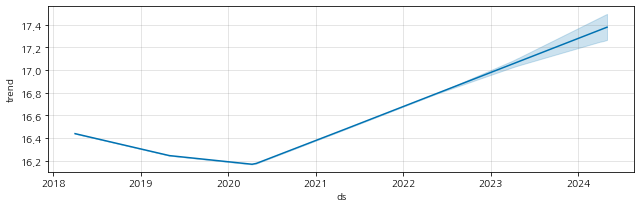

In [ ]:
fig4 = m.plot_components(forecast_4)

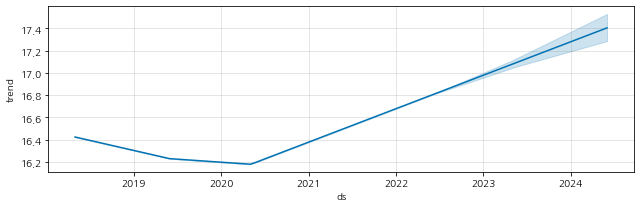

In [ ]:
fig5 = m.plot_components(forecast_5)

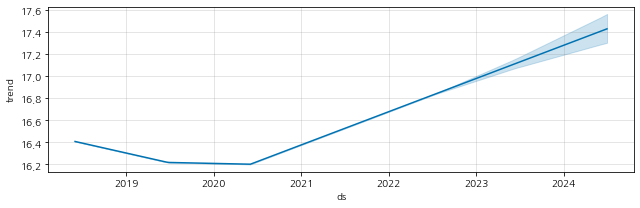

In [ ]:
fig6 = m.plot_components(forecast_6)

## **[보령]** 평균 기온변화

In [ ]:
path = '/content/drive/MyDrive/skt 데이터/data/충청남도/보령/'
file_list = os.listdir(path)
file_list_보령 = [file for file in file_list if file.endswith('.csv')]
file_list_보령 = natsort.natsorted(file_list_보령)
file_list_보령

['보령_2018.csv',
 '보령_2019.csv',
 '보령_2020.csv',
 '보령_2021.csv',
 '보령_2022.csv']

In [ ]:
Df = pd.DataFrame()
DF = pd.DataFrame()
for i in file_list_보령:
    data = pd.read_csv(path + i,encoding='cp949')
    Df = pd.concat([Df,data])
    DF = pd.concat([DF,data['평균기온(℃)']], axis=1)
    DF.rename(columns = {'평균기온(℃)' : i[6:10]}, inplace = True)

Df = Df.drop(columns = ['지점'])
df = Df.set_index(keys='날짜')
df = df.dropna()
DF = DF.dropna() 

**평균 기온 변화**

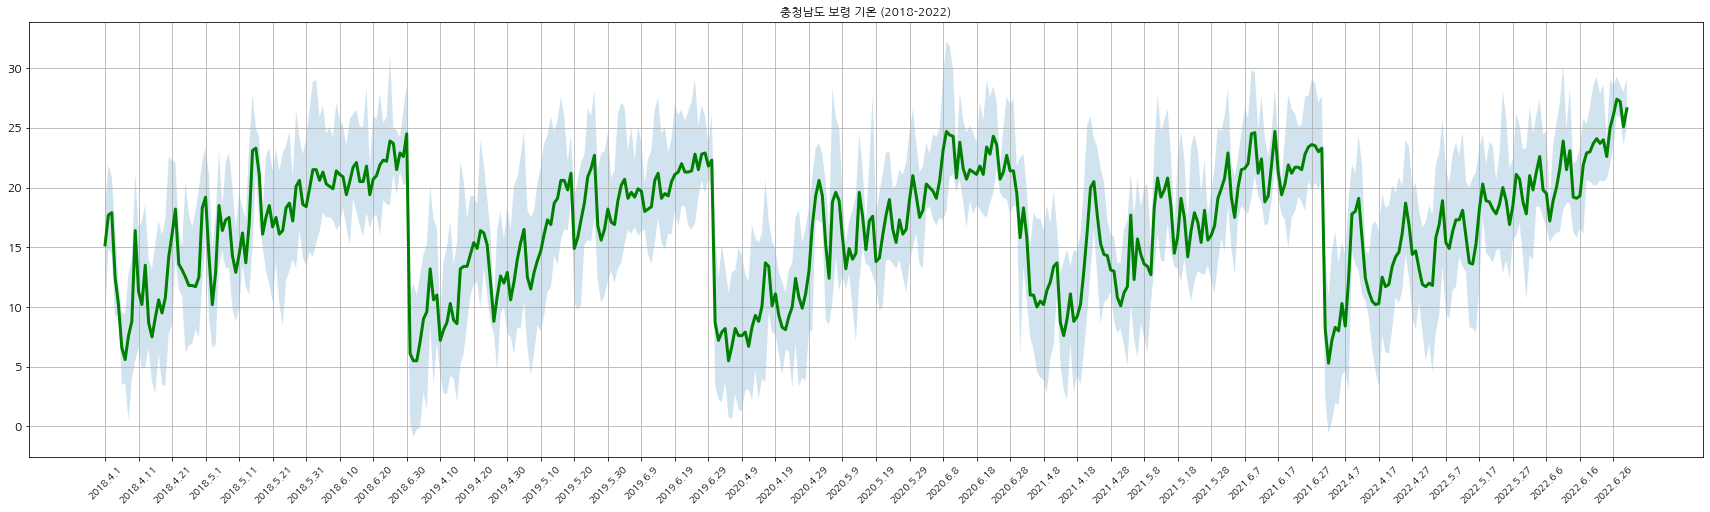

In [ ]:
date = df.index
plt.figure(figsize=(30, 8))
plt.fill_between(date,df['최저기온(℃)'], df['최고기온(℃)'], alpha=0.2)
gp = plt.plot(date, df['평균기온(℃)'])
plt.yticks(fontsize=12)
plt.grid(True)
plt.xticks(ticks=date, labels=labels, rotation=45)
plt.title('충청남도 보령 기온 (2018-2022)')
plt.locator_params(axis='x', nbins=len(labels))

plt.setp(gp, color='green', linewidth=3.0)
plt.show()

**년도 별 (4,5,6월 비교)**

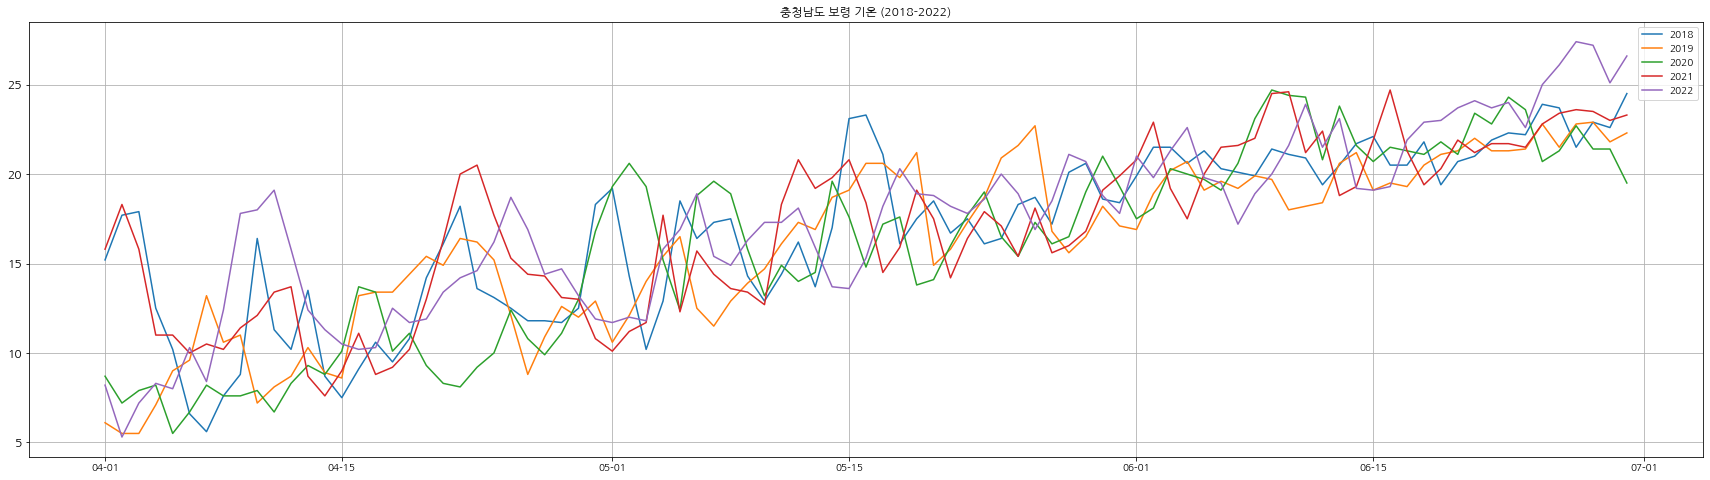

In [ ]:
from matplotlib import dates as mdates

d = pd.Series(pd.date_range(start='2000-04-01', end='2000-06-30', freq="D"))

plt.figure(figsize=(30, 8))
gp = plt.plot(d, DF)
plt.yticks(fontsize=12)
plt.grid(True)
plt.title('충청남도 보령 기온 (2018-2022)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.legend(DF.columns)

plt.show()

# **prophet : 보령 평균 기온 예측**

In [ ]:
m = Prophet()

Df.rename(columns = {'날짜' : 'ds'}, inplace = True)
Df.rename(columns = {'평균기온(℃)' : 'y'}, inplace = True)

m.fit(Df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/rso779db.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/pglb94ie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59357', 'data', 'file=/tmp/tmpo7y32ow3/rso779db.json', 'init=/tmp/tmpo7y32ow3/pglb94ie.json', 'output', 'file=/tmp/tmpo7y32ow3/prophet_modeletdzn_73/prophet_model-20221015160857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:08:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:08:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(future)
forecast = forecast[['ds', 'trend', 'trend_lower', 'trend_upper']]
forecast_4 = forecast[forecast['ds'].dt.month==4]
forecast_5 = forecast[forecast['ds'].dt.month==5]
forecast_6 = forecast[forecast['ds'].dt.month==6]

**보령 4월 평균 기온변화 추세**

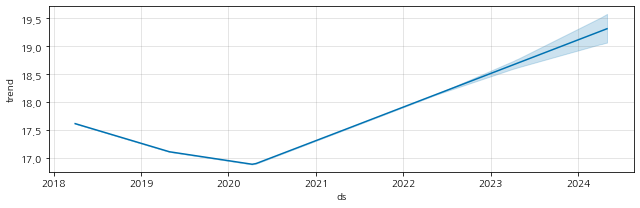

In [ ]:
fig4 = m.plot_components(forecast_4)

**보령 5월 평균 기온변화 추세**

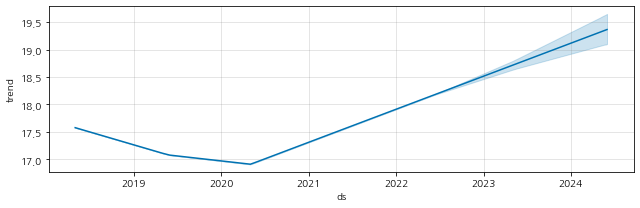

In [ ]:
fig5 = m.plot_components(forecast_5)

**보령 6월 평균 기온변화 추세**

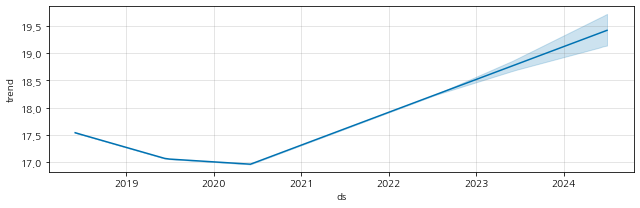

In [ ]:
fig6 = m.plot_components(forecast_6)

## **부여** 평균 기온변화

In [ ]:
path = '/content/drive/MyDrive/skt 데이터/data/충청남도/부여/'
file_list = os.listdir(path)
file_list_부여 = [file for file in file_list if file.endswith('.csv')]
file_list_부여 = natsort.natsorted(file_list_부여)
file_list_부여

['부여_2018.csv',
 '부여_2019.csv',
 '부여_2020.csv',
 '부여_2021.csv',
 '부여_2022.csv']

In [ ]:
Df = pd.DataFrame()
DF = pd.DataFrame()
for i in file_list_부여:
    data = pd.read_csv(path + i,encoding='cp949')
    Df = pd.concat([Df,data])
    DF = pd.concat([DF,data['평균기온(℃)']], axis=1)
    DF.rename(columns = {'평균기온(℃)' : i[5:9]}, inplace = True)

Df = Df.drop(columns = ['지점'])
df = Df.set_index(keys='날짜')
df = df.dropna()
DF = DF.dropna() 

**평균 기온 변화**

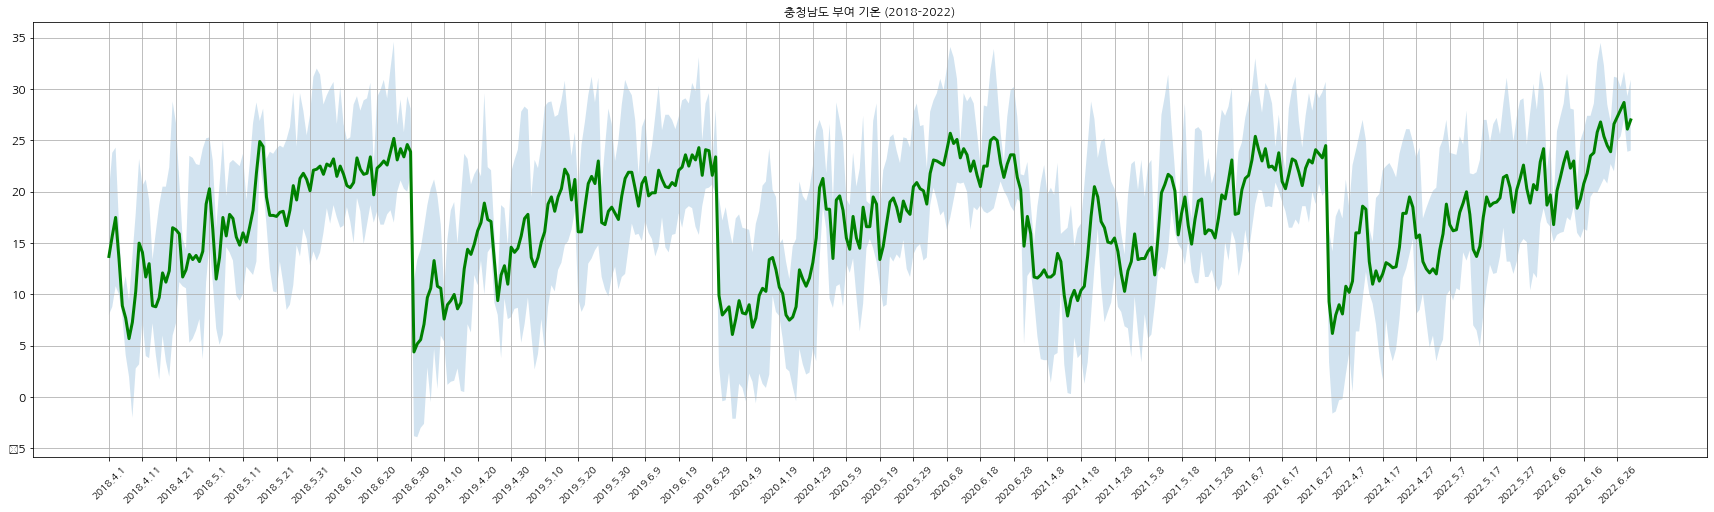

In [ ]:
date = df.index
plt.figure(figsize=(30, 8))
plt.fill_between(date,df['최저기온(℃)'], df['최고기온(℃)'], alpha=0.2)
gp = plt.plot(date, df['평균기온(℃)'])
plt.yticks(fontsize=12)
plt.grid(True)
plt.xticks(ticks=date, labels=labels, rotation=45)
plt.title('충청남도 부여 기온 (2018-2022)')
plt.locator_params(axis='x', nbins=len(labels))

plt.setp(gp, color='green', linewidth=3.0)
plt.show()

**년도 별 (4,5,6월 비교)**

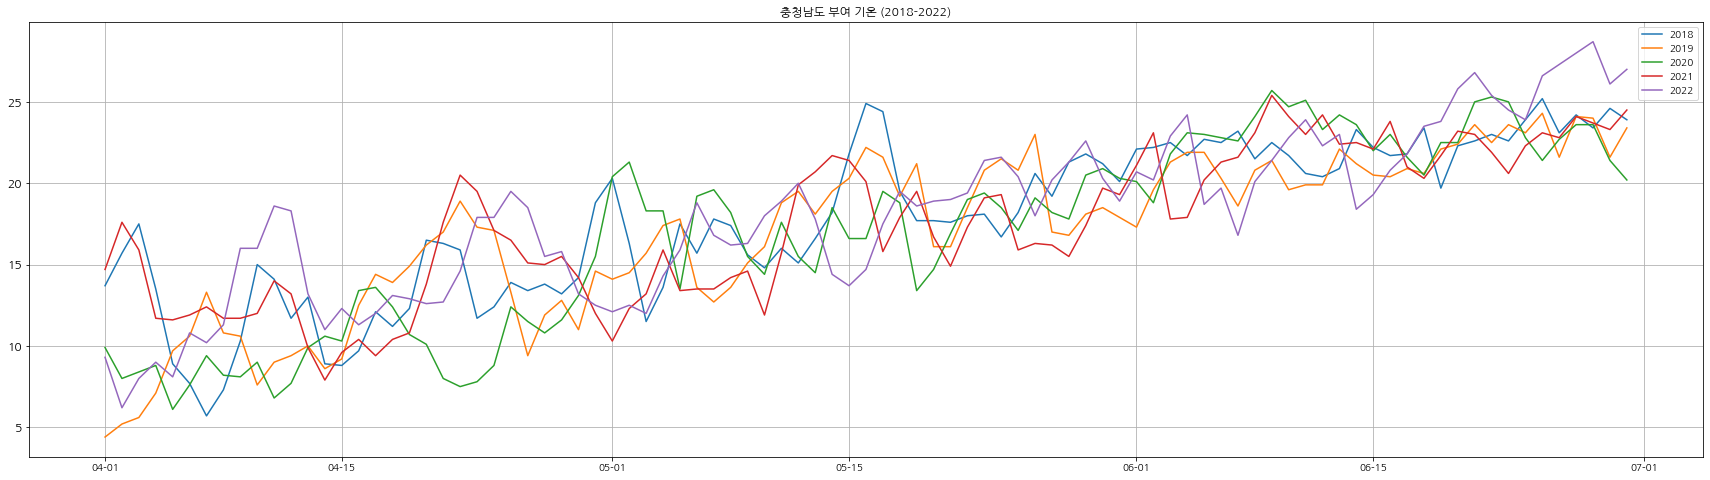

In [ ]:
from matplotlib import dates as mdates

d = pd.Series(pd.date_range(start='2000-04-01', end='2000-06-30', freq="D"))

plt.figure(figsize=(30, 8))
gp = plt.plot(d, DF)
plt.yticks(fontsize=12)
plt.grid(True)
plt.title('충청남도 부여 기온 (2018-2022)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.legend(DF.columns)

plt.show()

# **prophet : 부여 평균 기온 예측**

In [ ]:
m = Prophet()

Df.rename(columns = {'날짜' : 'ds'}, inplace = True)
Df.rename(columns = {'평균기온(℃)' : 'y'}, inplace = True)

m.fit(Df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/pq_z0tg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/k0g9e7tg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11556', 'data', 'file=/tmp/tmpo7y32ow3/pq_z0tg7.json', 'init=/tmp/tmpo7y32ow3/k0g9e7tg.json', 'output', 'file=/tmp/tmpo7y32ow3/prophet_modelstadig9l/prophet_model-20221015160944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(future)
forecast = forecast[['ds', 'trend', 'trend_lower', 'trend_upper']]
forecast_4 = forecast[forecast['ds'].dt.month==4]
forecast_5 = forecast[forecast['ds'].dt.month==5]
forecast_6 = forecast[forecast['ds'].dt.month==6]

**부여 4월 평균 기온변화 추세**

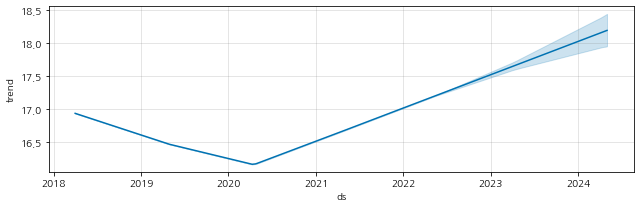

In [ ]:
fig4 = m.plot_components(forecast_4)

**부여 5월 평균 기온변화 추세**

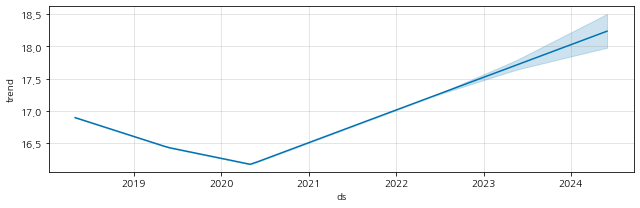

In [ ]:
fig5 = m.plot_components(forecast_5)

**부여 6월 평균 기온변화 추세**

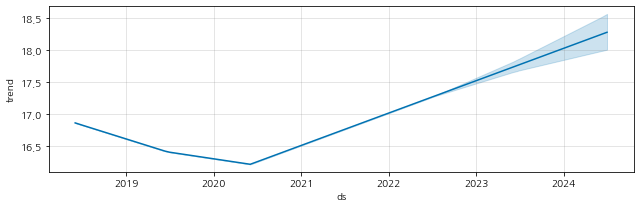

In [ ]:
fig6 = m.plot_components(forecast_6)

## **[서산]** 평균 기온변화

In [ ]:
path = '/content/drive/MyDrive/skt 데이터/data/충청남도/서산/'
file_list = os.listdir(path)
file_list_서산 = [file for file in file_list if file.endswith('.csv')]
file_list_서산 = natsort.natsorted(file_list_서산)
file_list_서산

['서산_2018.csv',
 '서산_2019.csv',
 '서산_2020.csv',
 '서산_2021.csv',
 '서산_2022.csv']

In [ ]:
Df = pd.DataFrame()
DF = pd.DataFrame()
for i in file_list_서산:
    data = pd.read_csv(path + i,encoding='cp949')
    Df = pd.concat([Df,data])
    DF = pd.concat([DF,data['평균기온(℃)']], axis=1)
    DF.rename(columns = {'평균기온(℃)' : i[6:10]}, inplace = True)

Df = Df.drop(columns = ['지점'])
df = Df.set_index(keys='날짜')
df = df.dropna()
DF = DF.dropna() 

In [ ]:
DF

,2018,2019,2020,2021,2022
0,13.1,4.8,9.9,16.2,7.5
1,15.9,5.0,8.4,16.9,4.8
2,16.9,5.5,8.4,14.6,6.5
3,11.6,7.2,8.3,11.3,7.5
4,9.3,10.2,6.3,10.7,7.1
...,...,...,...,...,...
86,22.2,21.7,21.7,23.5,25.1
87,21.7,23.4,23.0,23.8,26.3
88,21.9,23.1,22.7,23.3,26.0
89,22.5,22.1,21.5,23.4,24.2


**평균 기온 변화**

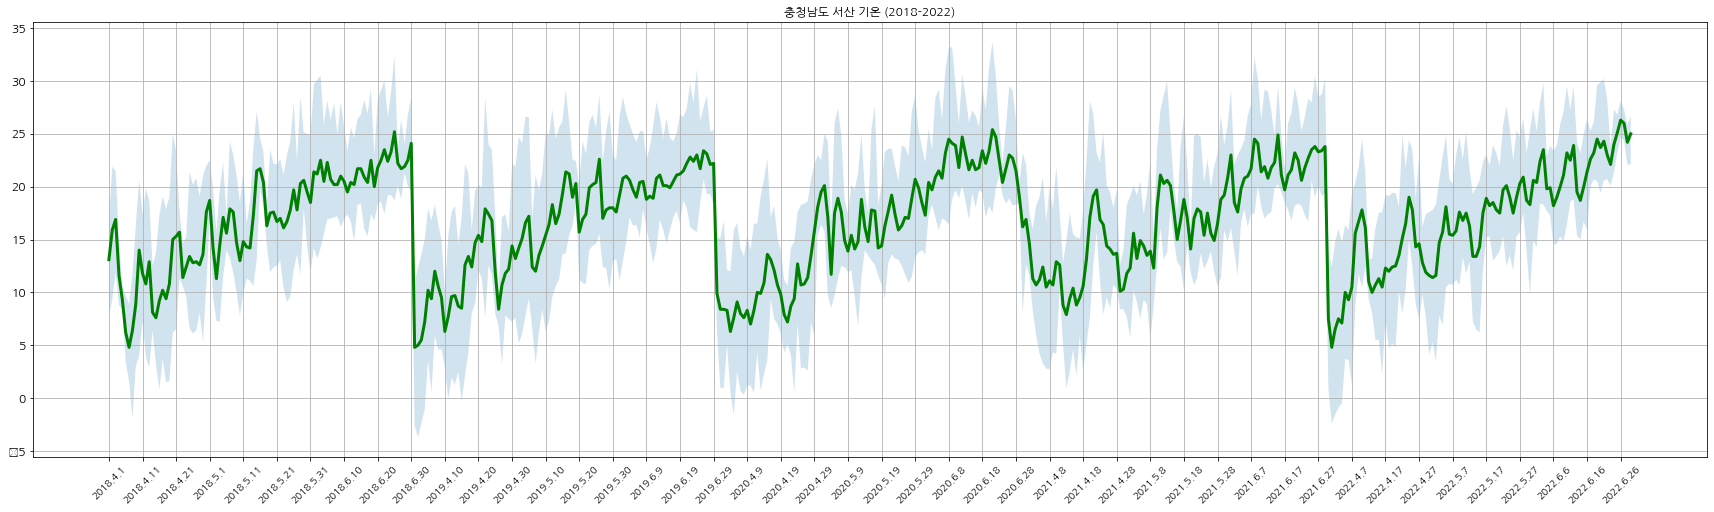

In [ ]:
date = df.index
plt.figure(figsize=(30, 8))
plt.fill_between(date,df['최저기온(℃)'], df['최고기온(℃)'], alpha=0.2)
gp = plt.plot(date, df['평균기온(℃)'])
plt.yticks(fontsize=12)
plt.grid(True)
plt.xticks(ticks=date, labels=labels, rotation=45)
plt.title('충청남도 서산 기온 (2018-2022)')
plt.locator_params(axis='x', nbins=len(labels))

plt.setp(gp, color='green', linewidth=3.0)
plt.show()

**년도 별 (4,5,6월 비교)**

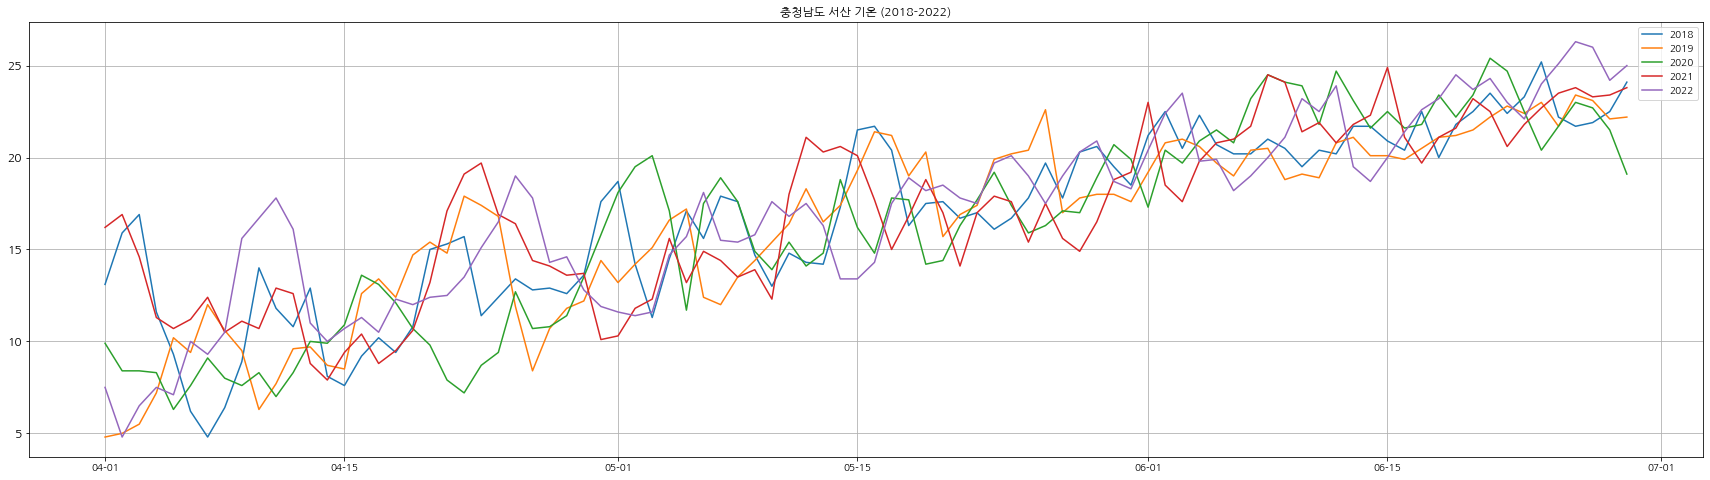

In [ ]:
from matplotlib import dates as mdates

# 90 row 이유?
d = pd.Series(pd.date_range(start='2000-04-01', end='2000-06-29', freq="D"))

plt.figure(figsize=(30, 8))
gp = plt.plot(d,DF)
plt.yticks(fontsize=12)
plt.grid(True)
plt.title('충청남도 서산 기온 (2018-2022)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.legend(DF.columns)

plt.show()

# **prophet : 서산 평균 기온 예측**

In [ ]:
m = Prophet()

Df.rename(columns = {'날짜' : 'ds'}, inplace = True)
Df.rename(columns = {'평균기온(℃)' : 'y'}, inplace = True)

m.fit(Df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/dmb_x9vg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/tw_4f0k0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96071', 'data', 'file=/tmp/tmpo7y32ow3/dmb_x9vg.json', 'init=/tmp/tmpo7y32ow3/tw_4f0k0.json', 'output', 'file=/tmp/tmpo7y32ow3/prophet_modeli9iw8k8f/prophet_model-20221015161016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(future)
forecast = forecast[['ds', 'trend', 'trend_lower', 'trend_upper']]
forecast_4 = forecast[forecast['ds'].dt.month==4]
forecast_5 = forecast[forecast['ds'].dt.month==5]
forecast_6 = forecast[forecast['ds'].dt.month==6]

**서산 4월 평균 기온변화 추세**

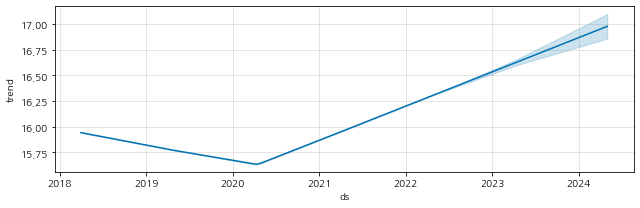

In [ ]:
fig4 = m.plot_components(forecast_4)

**서산 5월 평균 기온변화 추세**

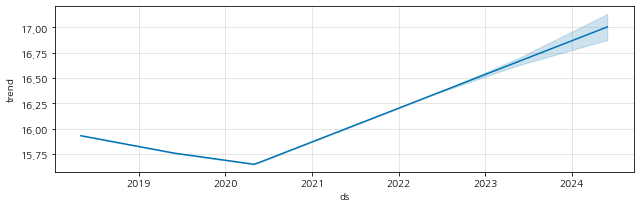

In [ ]:
fig5 = m.plot_components(forecast_5)

**서산 6월 평균 기온변화 추세**

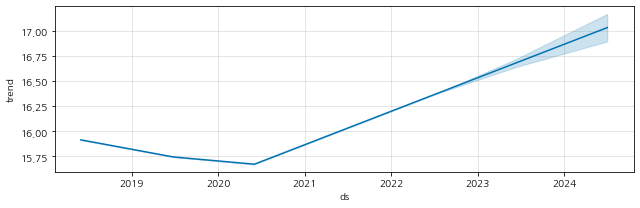

In [ ]:
fig6 = m.plot_components(forecast_6)

## **[천안]** 평균 기온변화

In [ ]:
path = '/content/drive/MyDrive/skt 데이터/data/충청남도/천안/'
file_list = os.listdir(path)
file_list_천안 = [file for file in file_list if file.endswith('.csv')]
file_list_천안 = natsort.natsorted(file_list_천안)
file_list_천안

['천안_2018.csv',
 '천안_2019.csv',
 '천안_2020.csv',
 '천안_2021.csv',
 '천안_2022.csv']

In [ ]:
Df = pd.DataFrame()
DF = pd.DataFrame()
for i in file_list_천안:
    data = pd.read_csv(path + i,encoding='cp949')
    Df = pd.concat([Df,data])
    DF = pd.concat([DF,data['평균기온(℃)']], axis=1)
    DF.rename(columns = {'평균기온(℃)' : i[7:11]}, inplace = True)

Df = Df.drop(columns = ['지점'])
df = Df.set_index(keys='날짜')
df = df.dropna()
DF = DF.dropna() 

**평균 기온 변화**

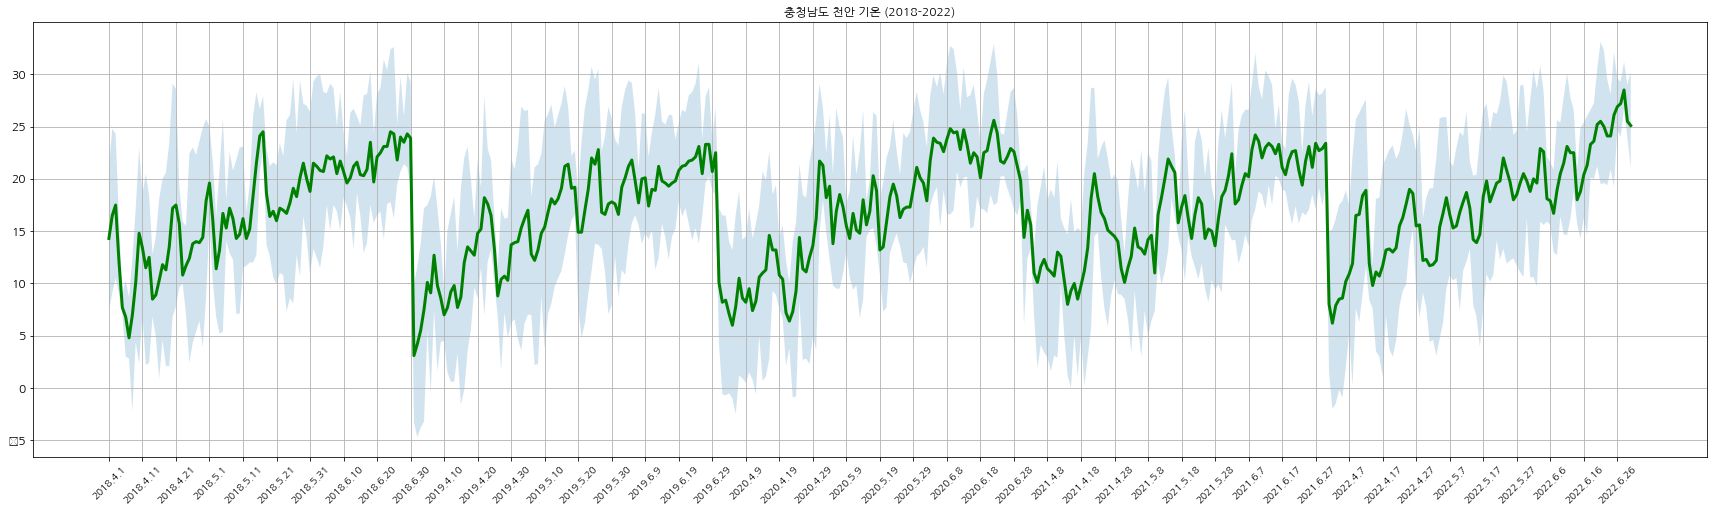

In [ ]:
date = df.index
plt.figure(figsize=(30, 8))
plt.fill_between(date,df['최저기온(℃)'], df['최고기온(℃)'], alpha=0.2)
gp = plt.plot(date, df['평균기온(℃)'])
plt.yticks(fontsize=12)
plt.grid(True)
plt.xticks(ticks=date, labels=labels, rotation=45)
plt.title('충청남도 천안 기온 (2018-2022)')
plt.locator_params(axis='x', nbins=len(labels))

plt.setp(gp, color='green', linewidth=3.0)
plt.show()

**년도 별 (4,5,6월 비교)**

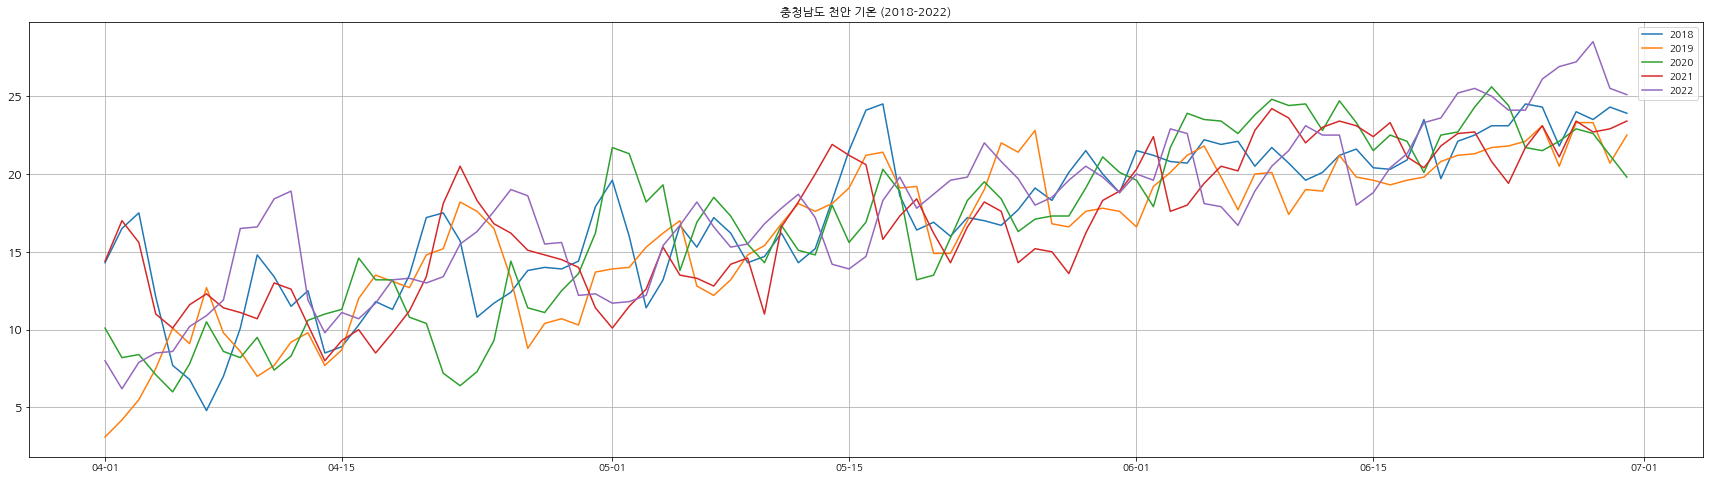

In [ ]:
from matplotlib import dates as mdates

d = pd.Series(pd.date_range(start='2000-04-01', end='2000-06-30', freq="D"))

plt.figure(figsize=(30, 8))
gp = plt.plot(d, DF)
plt.yticks(fontsize=12)
plt.grid(True)
plt.title('충청남도 천안 기온 (2018-2022)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.legend(DF.columns)

plt.show()

# **prophet : 천안 평균 기온 예측**

In [ ]:
m = Prophet()

Df.rename(columns = {'날짜' : 'ds'}, inplace = True)
Df.rename(columns = {'평균기온(℃)' : 'y'}, inplace = True)

m.fit(Df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/i44yu60n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/02tdfbi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37641', 'data', 'file=/tmp/tmpo7y32ow3/i44yu60n.json', 'init=/tmp/tmpo7y32ow3/02tdfbi1.json', 'output', 'file=/tmp/tmpo7y32ow3/prophet_modeldssyzz5t/prophet_model-20221015161041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:10:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(future)
forecast = forecast[['ds', 'trend', 'trend_lower', 'trend_upper']]
forecast_4 = forecast[forecast['ds'].dt.month==4]
forecast_5 = forecast[forecast['ds'].dt.month==5]
forecast_6 = forecast[forecast['ds'].dt.month==6]

**천안 4월 평균 기온변화 추세**

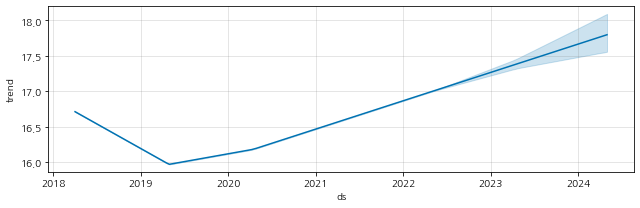

In [ ]:
fig4 = m.plot_components(forecast_4)

**천안 5월 평균 기온변화 추세**

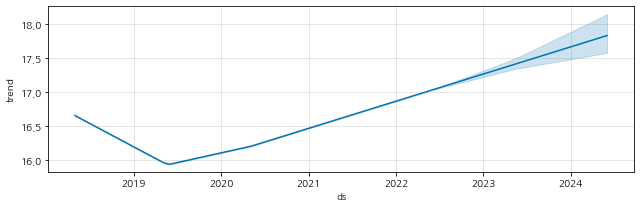

In [ ]:
fig5 = m.plot_components(forecast_5)

**천안 6월 평균 기온변화 추세**

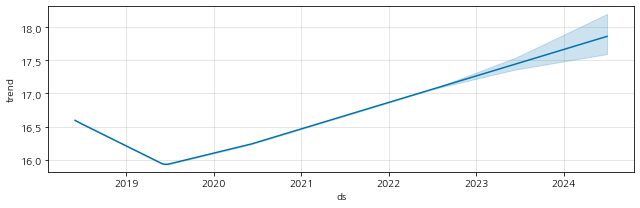

In [ ]:
fig6 = m.plot_components(forecast_6)

## **[홍성]** 평균 기온변화

In [ ]:
path = '/content/drive/MyDrive/skt 데이터/data/충청남도/홍성/'
file_list = os.listdir(path)
file_list_홍성 = [file for file in file_list if file.endswith('.csv')]
file_list_홍성 = natsort.natsorted(file_list_홍성)
file_list_홍성

['홍성_2018.csv',
 '홍성_2019.csv',
 '홍성_2020.csv',
 '홍성_2021.csv',
 '홍성_2022.csv']

In [ ]:
Df = pd.DataFrame()
DF = pd.DataFrame()
for i in file_list_홍성:
    data = pd.read_csv(path + i,encoding='cp949')
    Df = pd.concat([Df,data])
    DF = pd.concat([DF,data['평균기온(℃)']], axis=1)
    DF.rename(columns = {'평균기온(℃)' : i[7:11]}, inplace = True)

Df = Df.drop(columns = ['지점'])
df = Df.set_index(keys='날짜')
df = df.dropna()
DF = DF.dropna() 

**평균 기온 변화**

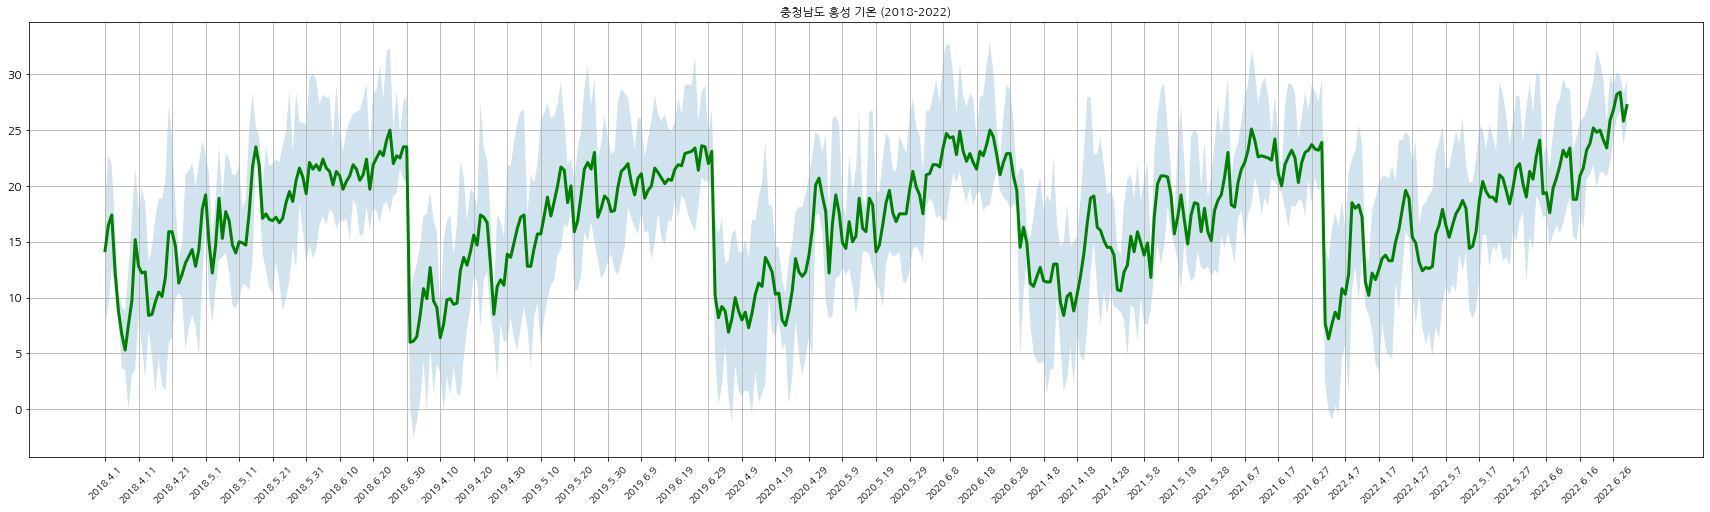

In [ ]:
date = df.index
plt.figure(figsize=(30, 8))
plt.fill_between(date,df['최저기온(℃)'], df['최고기온(℃)'], alpha=0.2)
gp = plt.plot(date, df['평균기온(℃)'])
plt.yticks(fontsize=12)
plt.grid(True)
plt.xticks(ticks=date, labels=labels, rotation=45)
plt.title('충청남도 홍성 기온 (2018-2022)')
plt.locator_params(axis='x', nbins=len(labels))

plt.setp(gp, color='green', linewidth=3.0)
plt.show()

**년도 별 (4,5,6월 비교)**

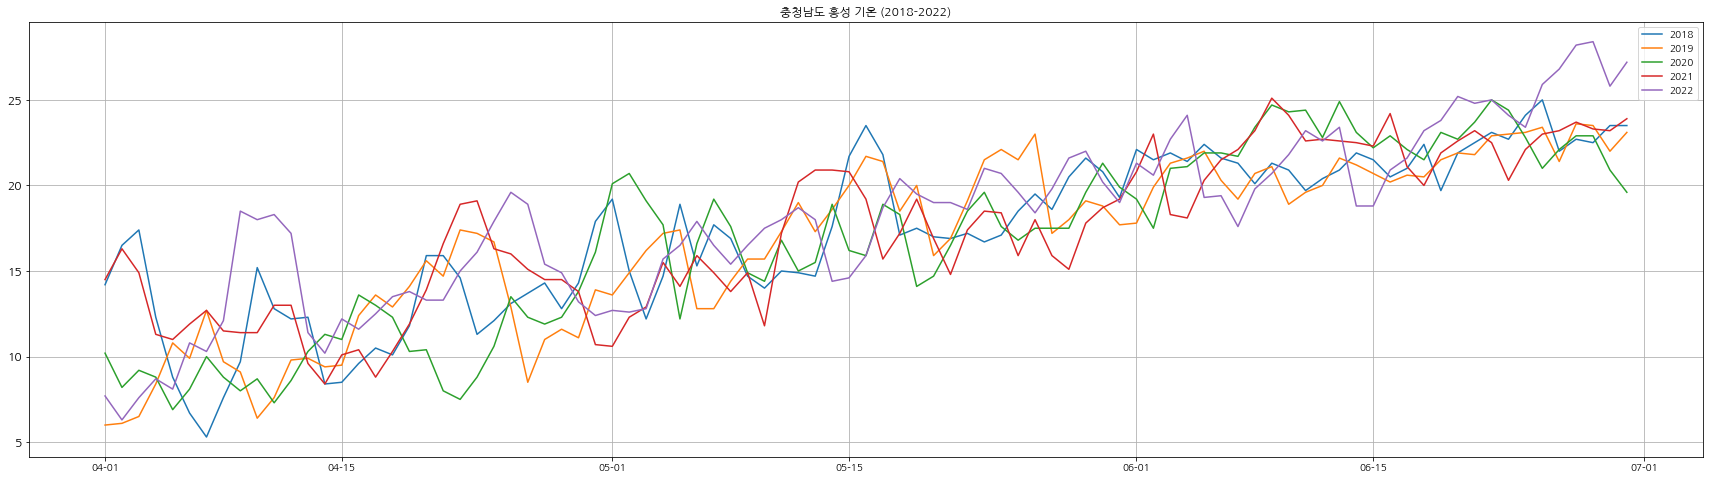

In [ ]:
from matplotlib import dates as mdates

d = pd.Series(pd.date_range(start='2000-04-01', end='2000-06-30', freq="D"))

plt.figure(figsize=(30, 8))
plt.plot(d, DF)
plt.yticks(fontsize=12)
plt.grid(True)
plt.title('충청남도 홍성 기온 (2018-2022)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.legend(DF.columns)

plt.show()

# **prophet : 홍성 평균 기온 예측**

In [ ]:
m = Prophet()

Df.rename(columns = {'날짜' : 'ds'}, inplace = True)
Df.rename(columns = {'평균기온(℃)' : 'y'}, inplace = True)

m.fit(Df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/n6bp12yt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7y32ow3/ni0u391c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33736', 'data', 'file=/tmp/tmpo7y32ow3/n6bp12yt.json', 'init=/tmp/tmpo7y32ow3/ni0u391c.json', 'output', 'file=/tmp/tmpo7y32ow3/prophet_modelrrhptm76/prophet_model-20221015161107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(future)
forecast = forecast[['ds', 'trend', 'trend_lower', 'trend_upper']]
forecast_4 = forecast[forecast['ds'].dt.month==4]
forecast_5 = forecast[forecast['ds'].dt.month==5]
forecast_6 = forecast[forecast['ds'].dt.month==6]

**홍성 4월 평균 기온변화 추세**

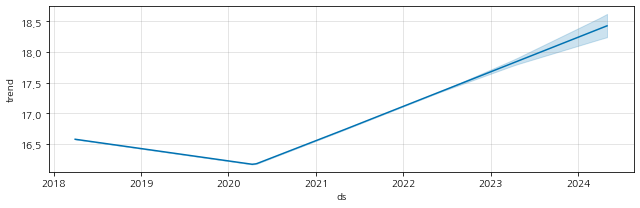

In [ ]:
fig4 = m.plot_components(forecast_4)

**홍성 5월 평균 기온변화 추세**

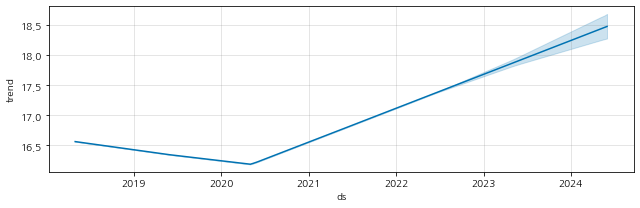

In [ ]:
fig5 = m.plot_components(forecast_5)

**홍성 6월 평균 기온변화 추세**

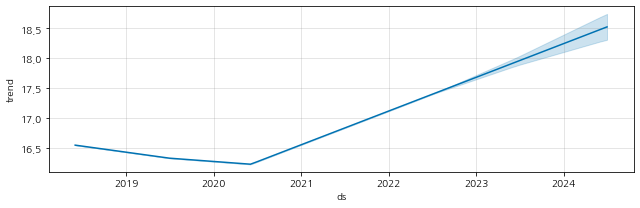

In [ ]:
fig6 = m.plot_components(forecast_6)